# Data Plotting


In [3]:
import numpy as np 
import matplotlib.pyplot as plt
plt.ion()
# Loads nicard and scope
manager.startModule('logic','cavitylogic')
import glob

In [4]:
filenames = glob.glob('./*.dat')
print(filenames)


fileNum=3
cavitylogic._load_full_sweep(filepath='', filename=filenames[fileNum])
cavitylogic._get_ramp_up_signgals()
print(filenames[fileNum])

['.\\2017-08-15_144400_full_sweep_data_calibrationOfStage.dat', '.\\2017-08-15_150436_full_sweep_data_calibration2.dat', '.\\2017-08-15_151042_full_sweep_data.dat', '.\\2017-08-15_151505_full_sweep_data.dat', '.\\2017-08-15_151553_full_sweep_data.dat', '.\\2017-08-15_151659_full_sweep_data.dat']
.\2017-08-15_151505_full_sweep_data.dat


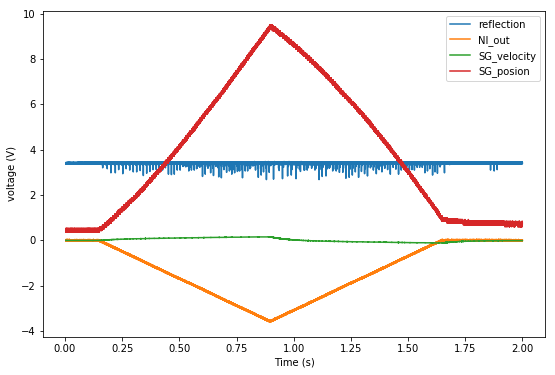

In [5]:
labels = ['reflection', 'NI_out', 'SG_velocity', 'SG_posion']
for i in range(4):
            plt.plot(cavitylogic.time,cavitylogic.volts[i], label = labels[i])
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('voltage (V)')
plt.show()

In [6]:
cavitylogic.time_trim, cavitylogic.volts_trim = cavitylogic._trim_data(cavitylogic.time, cavitylogic.volts)
cavitylogic._data_split_up()

0

In [7]:
cavitylogic.RampUp_signalSG_polyfit = cavitylogic._polyfit_SG(xdata=cavitylogic.RampUp_time,ydata=cavitylogic.RampUp_signalSG,order=3)

In [15]:
cavitylogic.ramp_popt = cavitylogic._fit_ramp(xdata=cavitylogic.time_trim[::10], ydata=cavitylogic.volts_trim[cavitylogic.ramp_channel,::10])


In [16]:
cavitylogic.ramp_popt

array([  3.07225344e-03,  -3.57492656e+00,   6.66896764e-01,
         1.47140712e-01])

In [14]:
cavitylogic.ramp_popt

array([  3.15240230e-03,  -3.57482268e+00,   6.66872108e-01,
         1.47118068e-01])

Max and min are 71.10000000000001, 2.6999999999999997 um
time 1.5


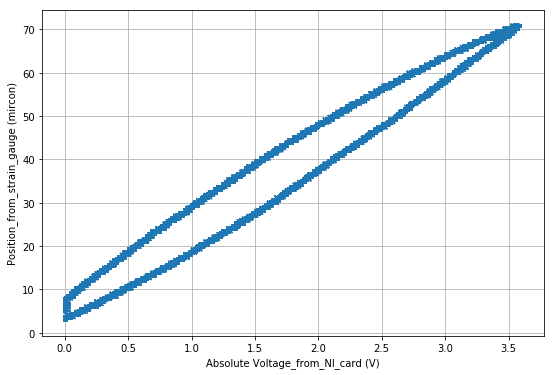

In [5]:
plt.plot(abs(cavitylogic.volts[1]),cavitylogic.volts[3]*75/10)

plt.legend()
plt.xlabel('Absolute Voltage_from_NI_card (V)')
plt.ylabel('Position_from_strain_gauge (mircon)')
plt.grid('on')
plt.show()
print('Max and min are {}, {} um'.format(pos.max(), pos.min()))
print('time {}'.format(cavitylogic.time_trim[-1]-cavitylogic.time_trim[0]))